Jacob Ballard  
Ryan Dome  
DSC 305a  
Lab 3: Customer Churn

# Lab 4 - Choosing a Model

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn import metrics


## Exploratory Data Analysis

**[Visit Kaggle to read the description and download the TelCo Customer Church dataset:](https://www.kaggle.com/blastchar/telco-customer-churn)**

*Insert a Code cell below. In it, import the dataset. Here is the link: [https://www.kaggle.com/blastchar/telco-customer-churn](https://www.kaggle.com/blastchar/telco-customer-churn). Dataset also available with this lab on Moodle.*

In [2]:
unharmed = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
unharmed = unharmed.set_index("customerID") 
# df = pd.read_csv("https://www.kaggle.com/blastchar/telco-customer-churn?select=WA_Fn-UseC_-Telco-Customer-Churn.csv")
df = pd.DataFrame(unharmed) # Make the dataframe a copy mainly to present the original
                            # at the top.

unharmed




,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


In [3]:
unharmed.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [4]:
for h in unharmed.columns:
    print(str(unharmed[h].describe()))

count     7043
unique       2
top       Male
freq      3555
Name: gender, dtype: object
count    7043.000000
mean        0.162147
std         0.368612
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: SeniorCitizen, dtype: float64
count     7043
unique       2
top         No
freq      3641
Name: Partner, dtype: object
count     7043
unique       2
top         No
freq      4933
Name: Dependents, dtype: object
count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64
count     7043
unique       2
top        Yes
freq      6361
Name: PhoneService, dtype: object
count     7043
unique       3
top         No
freq      3390
Name: MultipleLines, dtype: object
count            7043
unique              3
top       Fiber optic
freq             3096
Name: InternetService, dtype: object
count     7043
u

Why is the type of TotalCharges an object instead of float?

## Prepare Data for Model Building

**Clean the data, encode it, and take whatever other steps are necessary for modeling building.**

The categorical columns need to be converted into binary columns.  TotalCharges has empty entries.

In [5]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce') # Put NA where errors are
df['TotalCharges'] = df['TotalCharges'].fillna(0) # From the pandas library to fill NAs with 0


In [6]:
df_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
df = pd.get_dummies(df, columns = df_columns, drop_first = True) # Convert category columns to binary columns
df

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,1,29.85,29.85,0,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
5575-GNVDE,0,34,56.95,1889.50,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3668-QPYBK,0,2,53.85,108.15,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1
7795-CFOCW,0,45,42.30,1840.75,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
9237-HQITU,0,2,70.70,151.65,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6840-RESVB,0,24,84.80,1990.50,1,1,1,1,0,1,...,1,0,1,1,0,1,0,0,1,0
2234-XADUH,0,72,103.20,7362.90,0,1,1,1,0,1,...,1,0,1,1,0,1,1,0,0,0
4801-JZAZL,0,11,29.60,346.45,0,1,1,0,1,0,...,0,0,0,0,0,1,0,1,0,0


**Perform train-test split to partition your data into a training (80%) and test set (20%). Use stratified sampling to make sure each set contains a proportional number of customers who stay or leave the company.**

In [7]:
x = df.loc[ : , df.columns != 'Churn_Yes'] # All columns but the Churn column
y = df['Churn_Yes'] # The churn column is the dependent variable

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .20, stratify = y, random_state = 2022)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size = .25, stratify = y_train, random_state = 2022)





**Scale your data using an appropriate feature-scaling method.**

*We have discussed several feature-scaling methods: min-max scaler, standard scaler, and robust scaler. My favorite is standard scaler, unless there are a lot of outliers, in which case robust scaler may be helpful. Remember to fit the scaling parameters only on the training set and then apply those to the training and test sets. If you forget this, then there will be data leakage, resulting in a minimum two-letter grade deduction. Future assignments will not always remind you of this.*

In [9]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_valid = scaler.transform(x_valid)
x_test = scaler.transform(x_test)


## Fit a Logistic Regression Model

**Fit a logistic regression model to your training set.**

*At this point, I'm not looking for anything fancy like ridge or lasso regression or comparison of multiple models. That will come in later assignments.*


In [10]:
model = LogisticRegression(solver = 'lbfgs', multi_class = 'multinomial', C = 1.0, random_state = 0)


In [11]:
model.fit(x_train, y_train)

LogisticRegression(multi_class='multinomial', random_state=0)

In [12]:
model.coef_

array([[ 5.08290883e-03, -6.06417004e-01, -2.32158775e-01,
         2.35743786e-01, -7.94647674e-03,  3.12301750e-02,
        -6.28153990e-02, -2.25228410e-02,  2.25228410e-02,
         5.91257649e-02,  3.06236253e-01, -3.42025260e-02,
        -3.42025260e-02, -5.94272144e-02, -3.42025260e-02,
        -1.88487036e-02, -3.42025260e-02,  1.18357359e-04,
        -3.42025260e-02, -8.86932649e-02, -3.42025260e-02,
         7.47450055e-02, -3.42025260e-02,  1.04918891e-01,
        -1.20904576e-01, -2.83410021e-01,  8.14449805e-02,
         5.64368132e-03,  8.79354284e-02, -4.36207466e-03]])

In [13]:
model.intercept_

array([-0.84116363])

**Use your model to obtain the probability of churn of each customer given the data available to you.**

In [14]:
y_proba = model.predict_proba(x_valid)
y_predict = model.predict(x_valid) 
y_proba

array([[0.84975845, 0.15024155],
       [0.48656037, 0.51343963],
       [0.99455282, 0.00544718],
       ...,
       [0.93780086, 0.06219914],
       [0.91597302, 0.08402698],
       [0.62144208, 0.37855792]])

#### [Chance of not churning, Chance of Churning]

**As a baseline, evaluate the model on your *training* set.**

In [15]:
model.score(x_train, y_train)

0.8059171597633136

In [16]:
model.score(x_valid, y_valid)

0.801277501774308

In [17]:
model.score(x_test, y_test)

0.801277501774308

## Evaluate the Model

**Evaluate the model on the test set. First, obtain basic metrics including accuracy score and precision, recall, F1 score, and support for the two classes.**


In [50]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.74      0.79      0.76      1035
           1       0.27      0.22      0.25       374

    accuracy                           0.64      1409
   macro avg       0.51      0.51      0.50      1409
weighted avg       0.61      0.64      0.62      1409



### True Positives

In [19]:
# This is info on True Positives

y_test_TP = y_test[(y_test == 1) & (y_predict == 1)]

y_test_TP = y_test_TP.index.tolist()


df_TP = df.loc[pd.Index(y_test_TP)]

df_TP.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
count,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,...,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.0
mean,0.202381,18.154762,76.118452,1604.858929,0.619048,0.285714,0.107143,0.940476,0.059524,0.452381,...,0.476190,0.083333,0.476190,0.071429,0.035714,0.773810,0.107143,0.607143,0.166667,1.0
std,0.404188,19.349975,26.494387,1927.032361,0.488538,0.454467,0.311152,0.238024,0.238024,0.500717,...,0.502432,0.278045,0.502432,0.259086,0.186691,0.420877,0.311152,0.491319,0.374916,0.0
min,0.000000,1.000000,19.350000,19.450000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,0.000000,2.000000,55.587500,114.925000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.0
50%,0.000000,12.000000,82.950000,835.650000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.0
75%,0.000000,26.000000,97.100000,2251.012500,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.0
max,1.000000,69.000000,114.500000,7318.200000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0


High monthly costs, lower total costs.  Most have paperless billing. None were under contract.  They are newer customers that leave because they are dissatisfied.  

### True Negatives

In [20]:
# This is info on True Negatives
y_test_TP = y_test[(y_test == 0) & (y_predict == 0)]

y_test_TP = y_test_TP.index.tolist()


df_TP = df.loc[pd.Index(y_test_TP)]

df_TP.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
count,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,...,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.0
mean,0.124231,37.555966,62.423247,2598.884625,0.468635,0.528905,0.321033,0.910209,0.089791,0.418204,...,0.366544,0.261993,0.381304,0.244772,0.321033,0.554736,0.263223,0.238622,0.253383,0.0
std,0.330048,24.025405,30.946826,2350.484464,0.499322,0.499471,0.467161,0.286058,0.286058,0.493568,...,0.482157,0.439989,0.486006,0.430217,0.467161,0.497301,0.440653,0.426504,0.435216,0.0
min,0.000000,0.000000,18.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,15.000000,25.400000,601.600000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,0.000000,37.000000,66.250000,1742.450000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0
75%,0.000000,60.000000,89.400000,4297.950000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.0
max,1.000000,72.000000,118.600000,8529.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


These are long-term customers paying relatively less compared to the true positives.  They are less likely to be on paperless billing and less likely to be a senior citizen.  They are more likely to be under contract.

### False Positives

In [21]:
# This is info on False Positives

y_test_TP = y_test[(y_test == 0) & (y_predict == 1)]

y_test_TP = y_test_TP.index.tolist()


df_TP = df.loc[pd.Index(y_test_TP)]

df_TP.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
count,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.00000,222.000000,222.000000,222.000000,...,222.000000,222.000000,222.000000,222.000000,222.00000,222.000000,222.000000,222.000000,222.000000,222.0
mean,0.099099,39.959459,59.910135,2610.224550,0.513514,0.558559,0.36036,0.905405,0.094595,0.378378,...,0.369369,0.301802,0.369369,0.256757,0.36036,0.549550,0.270270,0.225225,0.234234,0.0
std,0.299470,24.351000,31.278104,2304.866891,0.500947,0.497681,0.48119,0.293316,0.293316,0.486079,...,0.483725,0.460077,0.483725,0.437831,0.48119,0.498663,0.445103,0.418675,0.424476,0.0
min,0.000000,1.000000,18.550000,19.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,18.000000,24.675000,728.225000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0
50%,0.000000,43.000000,61.575000,1744.275000,1.000000,1.000000,0.00000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.0
75%,0.000000,63.000000,85.725000,4405.075000,1.000000,1.000000,1.00000,1.000000,0.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,0.000000,0.000000,0.0
max,1.000000,72.000000,117.600000,8476.500000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,0.0


These customers pay almost the same amount as the true positives for their monthly charges.  They are more likely to be senior citizens and have a relatively short tenure compared to true positives.  These customers are less likely to have a partner than true negatives.  Most of these customers use paperless billing.  

### False Negatives

In [22]:
# This is info on False Negatives
y_test_TP = y_test[(y_test == 1) & (y_predict == 0)]

y_test_TP = y_test_TP.index.tolist()


df_TP = df.loc[pd.Index(y_test_TP)]

df_TP.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
count,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,...,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.0
mean,0.313793,18.051724,76.362931,1553.525172,0.465517,0.348276,0.200000,0.937931,0.062069,0.472414,...,0.465517,0.058621,0.472414,0.100000,0.034483,0.758621,0.103448,0.544828,0.186207,1.0
std,0.464836,19.007395,23.606033,1847.762731,0.499672,0.477248,0.400691,0.241698,0.241698,0.500101,...,0.499672,0.235319,0.500101,0.300519,0.182781,0.428659,0.305070,0.498847,0.389946,0.0
min,0.000000,1.000000,18.850000,18.850000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,0.000000,2.250000,69.100000,159.212500,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.0
50%,0.000000,10.000000,80.125000,804.050000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.0
75%,1.000000,28.750000,95.000000,2386.112500,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.0
max,1.000000,72.000000,117.800000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0


These customers have a mid-range tenure relative to true negatives and true positives.  They're monthly charges are higher than true negatives but also not nearly as high as true positives.  They are more likely to use paperless billing than true negatives.  They are more likely to be under contract compared to true positives.

**Display the confusion matrix for your model.**

In [23]:
confusion_matrix(y_test, y_predict)


array([[813, 222],
       [290,  84]])

**Display the ROC curve for your model as well as the ROC score.**

## K-Nearest Neighbors

In [51]:
k_model = KNeighborsClassifier(n_neighbors = 3, metric = 'manhattan')

k_model.fit(x_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=3)

In [25]:
k_model.score(x_valid, y_valid)
k_y_predict = k_model.predict(x_valid)
k_y_proba = k_model.predict_proba(x_valid)

In [26]:
k_model.score(x_valid, y_valid)

0.7608232789212207

## Decision Trees

In [52]:
tree_model = tree.DecisionTreeClassifier(random_state = 0)
tree_model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [28]:
tree_y_predict = tree_model.predict(x_valid)
tree_y_proba = tree_model.predict_proba(x_valid)

In [29]:
tree_model.score(x_valid, y_valid)

0.7217885024840313

## Decision Forests

In [30]:
forest_model = RandomForestClassifier(n_estimators = 10, random_state = 0)
forest_model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [42]:
forest_y_predict = forest_model.predict(x_valid)
forest_y_proba = forest_model.predict_proba(x_valid)
forest_y_proba

array([[0.2, 0.8],
       [0.7, 0.3],
       [1. , 0. ],
       ...,
       [0.8, 0.2],
       [0.7, 0.3],
       [0.6, 0.4]])

In [32]:
forest_model.score(x_valid, y_valid)

0.7792760823278921

## Support Vector Machines

In [44]:
svm_model = svm.SVC(random_state = 0, probability = True)
svm_model.fit(x_train, y_train)

SVC(probability=True, random_state=0)

In [45]:
svm_y_predict = svm_model.predict(x_valid)
svm_y_proba = svm_model.predict_proba(x_valid)
svm_y_proba

array([[0.84859416, 0.15140584],
       [0.70297556, 0.29702444],
       [0.84945075, 0.15054925],
       ...,
       [0.90483229, 0.09516771],
       [0.88328813, 0.11671187],
       [0.61377308, 0.38622692]])

In [35]:
svm_model.score(x_valid, y_valid)

0.7920511000709723

In [36]:
svm_model.score(x_test, y_test)

0.794180269694819

In [37]:
svm_model.score(x_train, y_train)

0.818698224852071

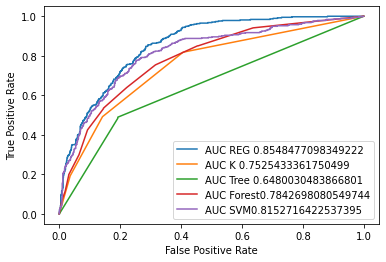

In [48]:
y_pred_proba = model.predict_proba(x_valid)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_valid,  y_pred_proba)
auc = metrics.roc_auc_score(y_valid, y_pred_proba)

# k_model
k_y_pred_proba = k_model.predict_proba(x_valid)[::,1]
k_fpr, k_tpr, _ = metrics.roc_curve(y_valid,  k_y_pred_proba)
k_auc = metrics.roc_auc_score(y_valid, k_y_pred_proba)

# tree_model
tree_y_pred_proba = tree_model.predict_proba(x_valid)[::,1]
tree_fpr, tree_tpr, _ = metrics.roc_curve(y_valid,  tree_y_pred_proba)
tree_auc = metrics.roc_auc_score(y_valid, tree_y_pred_proba)

# forest_model
forest_y_pred_proba = forest_model.predict_proba(x_valid)[::,1]
forest_fpr, forest_tpr, _ = metrics.roc_curve(y_valid,  forest_y_pred_proba)
forest_auc = metrics.roc_auc_score(y_valid, forest_y_pred_proba)

# svm_model
svm_y_pred_proba = svm_model.predict_proba(x_valid)[::,1]
svm_fpr, svm_tpr, _ = metrics.roc_curve(y_valid,  svm_y_pred_proba)
svm_auc = metrics.roc_auc_score(y_valid, svm_y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr, label = "AUC REG " + str(auc))
plt.plot(k_fpr,k_tpr, label = "AUC K " + str(k_auc))
plt.plot(tree_fpr,tree_tpr, label = "AUC Tree " + str(tree_auc))
plt.plot(forest_fpr,forest_tpr, label = "AUC Forest" + str(forest_auc))
plt.plot(svm_fpr,svm_tpr, label = "AUC SVM" + str(svm_auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

As seen by the ROC curve, logistic regression is the best model and should be used.

## Acknowledgements 

Ryan was an excellent partner.  I would say he did about 60% of the work, 40% for me.  We were able to meet a couple times and worked effectively.  I would work with Ryan again.

## References

<ul><li><a href = https://stackoverflow.com/questions/62268607/how-to-print-the-results-of-true-positives-false-positives-etc>https://stackoverflow.com/questions/62268607/how-to-print-the-results-of-true-positives-false-positives-etc</li><li>The pandas reference guide</li><li>The KNN Demo from Moodle</li><li><a href = https://appnava.medium.com/what-is-accuracy-precision-recall-f1-score-256613e4b89>https://appnava.medium.com/what-is-accuracy-precision-recall-f1-score-256613e4b89</li>